#**spatial analysis**

In [248]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


districts = gpd.read_file("districts_sample_200 (1).geojson")

rest_gdf = gpd.read_file("Riyadh_Restaurants_filtered.geojson")


sample_name ="الرمال"
sample_district = districts[districts["NEIGHBORHANAME"] == sample_name]



rest_sample = gpd.sjoin(
    rest_gdf,
    sample_district[["geometry"]],
    predicate="within",
    how="inner"
)

rest_sample.head()


,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,geometry,index_right
781,٦٠ نوع من الشاهي,Food Truck,"الرياض 13256, المملكة العربية السعودية",24.857252,46.781450,Cheap,3.0,17,0,,,POINT (679991.617 2750318.102),0
1557,مطعم ورق التوت,Arepa Restaurant,المملكة العربية السعودية,24.826933,46.793256,Cheap,1.0,3,1,,,POINT (681228.911 2746975.542),0
1558,Beans Wagon (عربة الفول),Breakfast Spot,"Shiekh Jaber Rd., الرياض, المملكة العربية السع...",24.827157,46.796293,Cheap,45.0,31,7,8.1,56.0,POINT (681535.509 2747004.374),0
1559,Al Nafoora (مطاعم النافورة),Middle Eastern Restaurant,"الرياض, المملكة العربية السعودية",24.826092,46.797255,Moderate,10.0,4,6,5.7,22.0,POINT (681634.357 2746887.748),0
1560,بوفية الكبدة الطازجة,Breakfast Spot,"الرياض 13254, المملكة العربية السعودية",24.826953,46.796460,Cheap,0.0,2,0,,,POINT (681552.728 2746982.05),0


In [249]:
districts = districts.rename(columns={
    "NEIGHBORHENAME": "DISTRICT_NAME_EN"
})
districts.head()

,OBJECTID,NEIGHBORHCODE,NEIGHBORHANAME,DISTRICT_NAME_EN,MUNICIPALITYCODE,MUNICIPALITYANAME,MUNICIPALITYNO,DISTRICTNO,HASRIYADH,geometry
0,1888.0,89.0,الرمال,AR-RIMAL,7.0,الروضة,44.0,38.0,0.0,"POLYGON ((670816.266 2777247.418, 670543.304 2..."
1,1789.0,93.0,اليرموك,AL-YARMUK,7.0,الروضة,44.0,49.0,0.0,"POLYGON ((682839.038 2745039.128, 681696.589 2..."
2,1837.0,133.0,بدر,BADER,11.0,الشفا,47.0,132.0,0.0,"POLYGON ((674464.112 2718522.862, 674454.152 2..."
3,1824.0,154.0,المهدية,AL-MAHDIYAH,14.0,عرقة,38.0,160.0,0.0,"POLYGON ((661575.774 2729310.908, 661569.102 2..."
4,1804.0,67.0,جامعة الملك سعود,KING SAUD UNIVERSITY,4.0,المعذر,42.0,62.0,0.0,"POLYGON ((666572.394 2735002.074, 666366.489 2..."


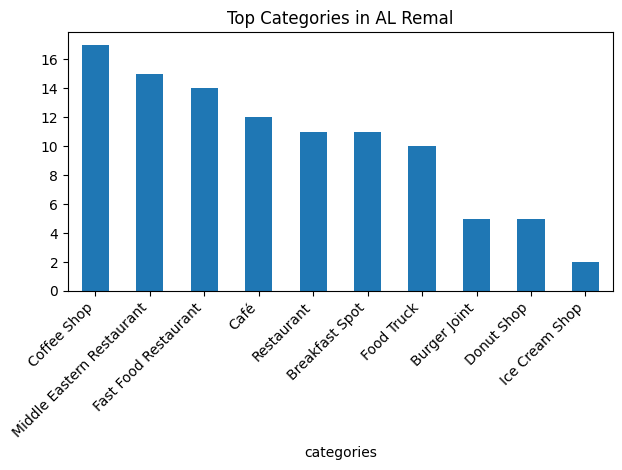

In [250]:
rest_sample["categories"].value_counts().head(10).plot(kind="bar")
plt.xticks(rotation=45, ha="right")
plt.title("Top Categories in AL Remal")
plt.tight_layout()
plt.show()

In [251]:
# spatial join: إلحاق كل مطعم بالحي اللي يقع فيه
rest_with_district = gpd.sjoin(
    rest_gdf,
    districts[["DISTRICTNO", "DISTRICT_NAME_EN","NEIGHBORHANAME", "geometry"]],
    predicate="within",
    how="left"
)

rest_with_district.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,geometry,index_right,DISTRICTNO,DISTRICT_NAME_EN,NEIGHBORHANAME
0,بهارات الأولين,Middle Eastern Restaurant,"الرياض, المملكة العربية السعودية",24.525009,46.687660,Moderate,8.0,10,6,7.8,9.0,POINT (670966.47 2713399.712),2,132.0,BADER,بدر
1,‏سيارة الأيسكريم,"Food Truck, Ice Cream Shop","الرياض, المملكة العربية السعودية",24.528172,46.692566,Cheap,0.0,1,0,,,POINT (671459.309 2713756.064),2,132.0,BADER,بدر
2,Pizza Hut (بيتزا هت),Pizza Place,"حي الشفاء (طريق ديراب), الرياض, المملكة العربي...",24.530758,46.687128,Cheap,4.0,4,0,,,POINT (670904.737 2714035.823),2,132.0,BADER,بدر
3,Croissant Cafe || كروسان كافيه,Café,المملكة العربية السعودية,24.530341,46.688500,Cheap,0.0,3,0,,,POINT (671044.375 2713991.327),2,132.0,BADER,بدر
4,بريڤي لاونج,Café,"الرياض, المملكة العربية السعودية",24.528991,46.729956,Cheap,2.0,12,1,,,POINT (675246.538 2713893.809),2,132.0,BADER,بدر


# Q1 — Number of restaurants per district

In [252]:
rest_count = (
    rest_with_district
    .groupby("DISTRICT_NAME_EN")
    .size()
    .reset_index(name="n_restaurants")
)
rest_count

,DISTRICT_NAME_EN,n_restaurants
0,NORTH AL-MATHAR,177
1,AD-DAHOU,1
2,AL-JARRADIYAH,17
3,AL-MAHDIYAH,5
4,AL-WOROUD,171
5,AL-YARMUK,304
6,AN-NASIRIYAH,11
7,AR-RIMAL,139
8,BADER,187
9,DAHRAT AL-BADEAH,195


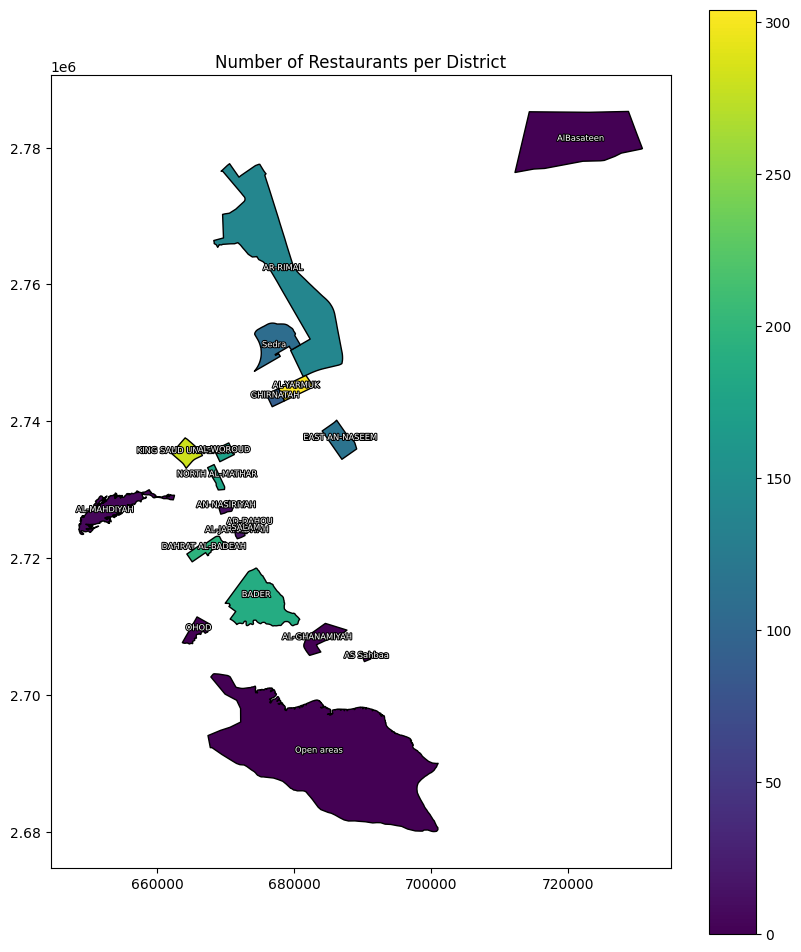

In [253]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Merge and fill NaNs
districts_count = districts.merge(rest_count, on="DISTRICT_NAME_EN", how="left")
districts_count["n_restaurants"] = districts_count["n_restaurants"].fillna(0)

# Create figure + plot choropleth, and CAPTURE the axes
fig, ax = plt.subplots(figsize=(10, 12))

districts_count.plot(
    ax=ax,                         # <--- important
    column="n_restaurants",
    cmap="viridis",
    legend=True,
    edgecolor="black"
)

# Add labels
for idx, row in districts_count.iterrows():
    p = row.geometry.representative_point()  # point inside polygon
    x, y = p.x, p.y

    ax.annotate(
        row["DISTRICT_NAME_EN"],   # district name in English
        xy=(x, y),
        ha="center",
        fontsize=6,
        color="white",
        path_effects=[
            path_effects.Stroke(linewidth=1.5, foreground="black"),
            path_effects.Normal()
        ]
    )

plt.title("Number of Restaurants per District")
plt.show()


# Q2 — Density of restaurants per square kilometer

In [254]:
districts_count["area_m2"] = districts_count.geometry.area
districts_count["area_km2"] = districts_count["area_m2"] / 1e6

districts_count["density"] = (
    districts_count["n_restaurants"] / districts_count["area_km2"]
)


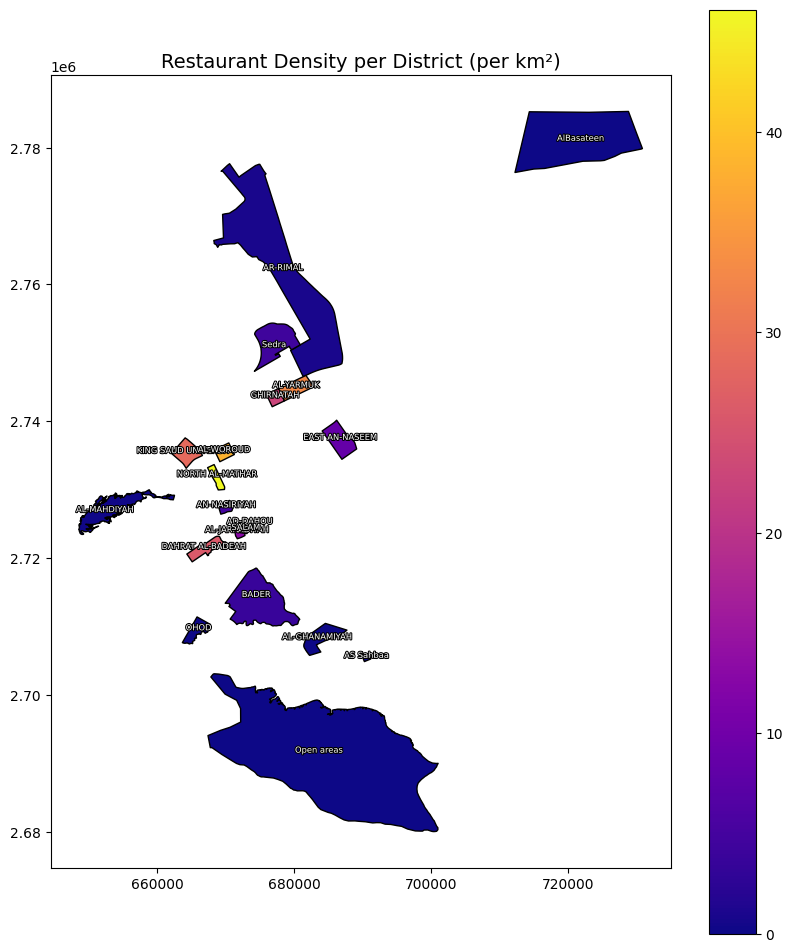

In [255]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Create figure + axis
fig, ax = plt.subplots(figsize=(10,12))

# Plot the density map
districts_count.plot(
    ax=ax,                     # IMPORTANT
    column="density",
    cmap="plasma",
    legend=True,
    edgecolor="black"
)

# Add labels
for idx, row in districts_count.iterrows():
    p = row.geometry.representative_point()  # point inside polygon
    x, y = p.x, p.y

    ax.annotate(
        row["DISTRICT_NAME_EN"],   # district name in English
        xy=(x, y),
        ha="center",
        fontsize=6,
        color="white",
        path_effects=[
            path_effects.Stroke(linewidth=1.5, foreground="black"),
            path_effects.Normal()
        ]
    )

# Title
plt.title("Restaurant Density per District (per km²)", fontsize=14)
plt.show()



#Q3 — Average rating per district (Spatial Rating Map)

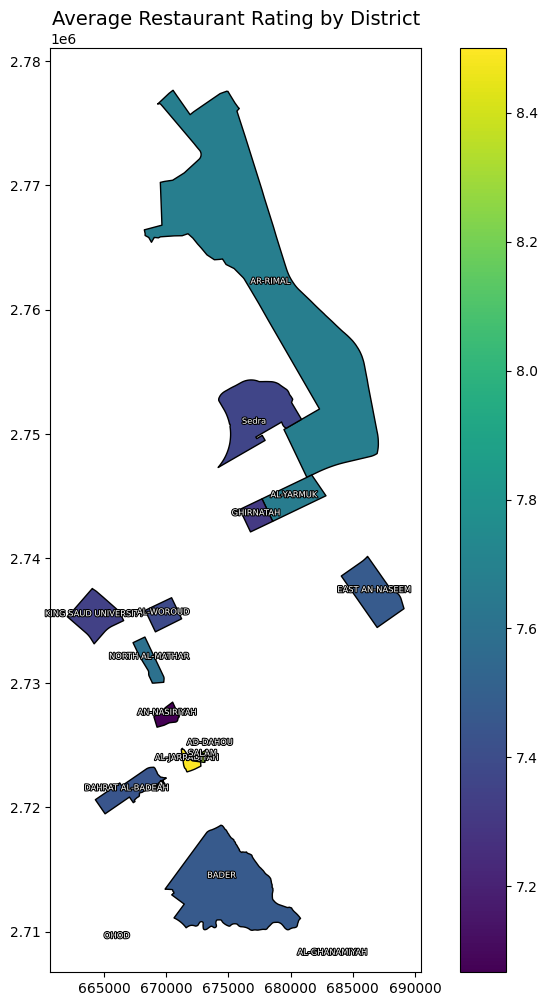

In [256]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(figsize=(10, 12))

# Plot choropleth map of average rating
districts_rating.plot(
    ax=ax,
    column="avg_rating",
    cmap="viridis",
    legend=True,
    edgecolor="black"
)

# Add district labels
for idx, row in districts_rating.iterrows():
    p = row.geometry.representative_point()  # point inside polygon
    x, y = p.x, p.y

    ax.annotate(
        row["DISTRICT_NAME_EN"],      # <-- هنا اسم الحي بالإنجليزي
        xy=(x, y),
        ha="center",
        fontsize=6,
        color="white",
        path_effects=[
            path_effects.Stroke(linewidth=1.5, foreground="black"),
            path_effects.Normal()
        ]
    )

plt.title("Average Restaurant Rating by District", fontsize=14)
plt.show()


# **Non-spatial analysis**

In [257]:
import geopandas as gpd
import matplotlib.pyplot as plt

df = gpd.read_file("Riyadh_Restaurants_filtered.geojson")


top_cats = df["categories"].value_counts().head(10)
top_cats

,count
categories,
Coffee Shop,214
Café,186
Middle Eastern Restaurant,120
Fast Food Restaurant,77
Restaurant,71
Dessert Shop,67
Pizza Place,66
Burger Joint,64
Bakery,61


# Q1 — What are the most common restaurant categories?

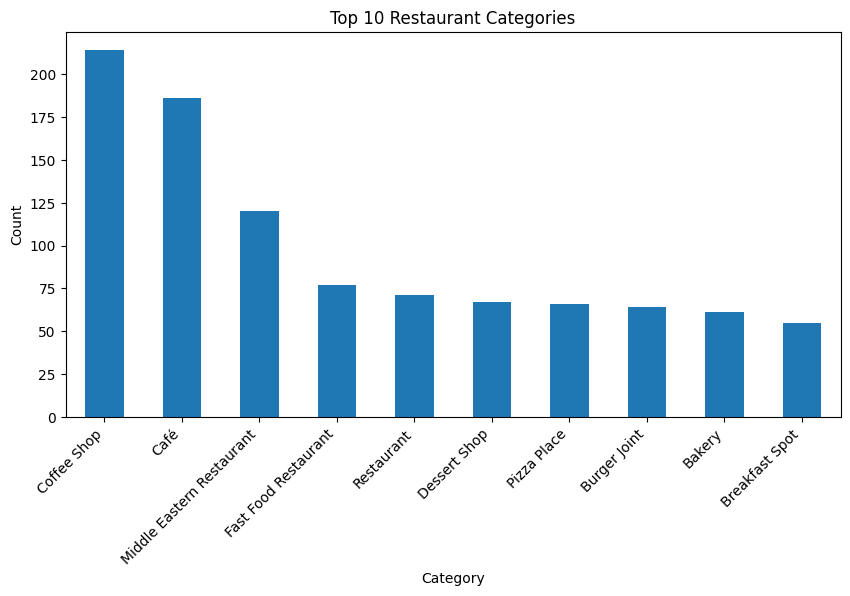

In [258]:
top_cats.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Restaurant Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


#Q2 — Distribution of restaurant ratings

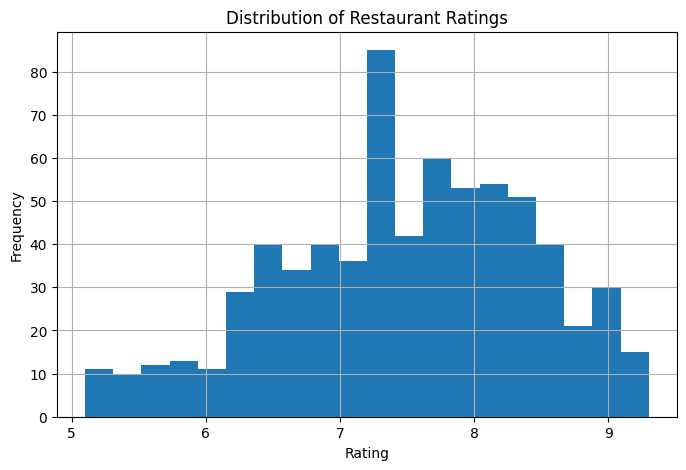

In [259]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

df["rating"].hist(bins=20, figsize=(8,5))
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Q3 — Which restaurants are the most popular?

In [260]:
import numpy as np
import pandas as pd


df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["ratingSignals"] = pd.to_numeric(df["ratingSignals"], errors="coerce")

def agg_cat(group):

    r = group["rating"].astype(float)
    s = group["ratingSignals"].astype(float)
    w = s.fillna(0)


    if w.sum() == 0:
        weighted_avg = r.mean()
    else:

        weighted_avg = np.average(r.fillna(r.mean()), weights=w)

    return pd.Series({
        "avg_rating_simple": r.mean(),      # متوسط عادي
        "avg_rating_weighted": weighted_avg,# متوسط موزون بعدد اللي قيّموا
        "total_signals": w.sum(),           # مجموع ratingSignals للتصنيف
        "count_places": len(group),         # عدد الأماكن في التصنيف
    })

cat_stats = (
    df.groupby("categories")
      .apply(agg_cat, include_groups=False)
      .reset_index()
)


In [261]:
popular = df.sort_values(by="ratingSignals", ascending=False)[
    ["name", "categories", "rating", "ratingSignals"]
].head(10)
popular

,name,categories,rating,ratingSignals
953,Starbucks (ستاربكس),Coffee Shop,9.0,5584.0
1001,66 Cups,Coffee Shop,8.7,3704.0
428,Starbucks (ستاربكس),Coffee Shop,9.0,3557.0
517,Starbucks Reserve (ستاربكس ريزيرف),Coffee Shop,9.2,2357.0
1004,Surround (سراوند),"Breakfast Spot, Burger Joint",8.9,2009.0
663,Starbucks (ستاربكس),Coffee Shop,8.3,1974.0
475,BOOZE Speciality Coffee Bar,Coffee Shop,7.6,1603.0
503,Piatto (بياتو),"Italian Restaurant, Pizza Place",8.2,1419.0
566,T.G.I. Friday's (فرايديز),American Restaurant,7.7,1401.0
419,Richony Cafè (قهوة ريتشوني),"Café, Coffee Shop",9.0,1400.0


# Q4 — Which categories have the highest average rating?

In [262]:
cat_filtered = cat_stats[cat_stats["count_places"] > 30]
cat_filtered.sort_values("avg_rating_simple", ascending=False).head(10)

,categories,avg_rating_simple,avg_rating_weighted,total_signals,count_places
98,Donut Shop,8.068182,8.510147,4691.0,35.0
13,Bakery,7.831250,8.186086,769.0,61.0
57,Coffee Shop,7.818182,8.625659,32153.0,214.0
143,Ice Cream Shop,7.800000,8.377478,928.0,44.0
22,Breakfast Spot,7.790909,7.845759,507.0,55.0
154,Juice Bar,7.768750,8.614971,1209.0,39.0
117,Food Truck,7.700000,8.656545,191.0,42.0
81,Dessert Shop,7.604000,8.404277,1543.0,67.0
187,Pizza Place,7.367647,7.525887,1437.0,66.0
28,Burger Joint,7.300000,7.815027,2735.0,64.0


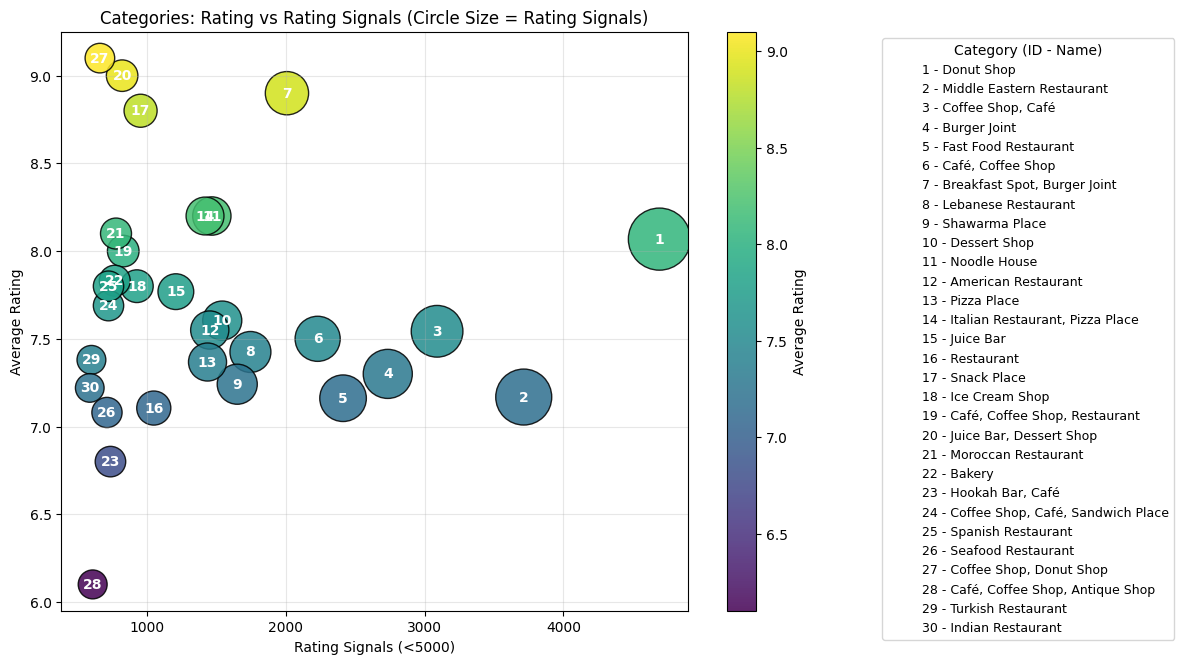

In [263]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np


cat_stats = (
    df.groupby("categories")
      .agg(
          avg_rating=("rating", "mean"),
          signals=("ratingSignals", "sum")
      )
)

# 1) اختاري التصنيفات اللي signals أقل من 5000 ثم خذي أعلى 15 من ناحية signals
cat_plot = (
    cat_stats[cat_stats["signals"] < 5000]
    .sort_values("signals", ascending=False)
    .head(30)
    .copy()
)

# 2) رقم لكل تصنيف
cat_plot["cat_id"] = np.arange(1, len(cat_plot) + 1)

# 3) حجم الدائرة بحسب signals
sizes = (cat_plot["signals"] / cat_plot["signals"].max()) * 1800 + 200

plt.figure(figsize=(12,7))

scatter = plt.scatter(
    cat_plot["signals"],
    cat_plot["avg_rating"],
    s=sizes,
    c=cat_plot["avg_rating"],
    cmap="viridis",
    alpha=0.85,
    edgecolors="black",
)

# 4) اكتب رقم التصنيف داخل الدائرة
for idx, row in cat_plot.iterrows():
    plt.text(
        row["signals"],
        row["avg_rating"],
        str(int(row["cat_id"])),
        ha="center",
        va="center",
        fontsize=10,
        color="white",
        fontweight="bold"
    )


cbar = plt.colorbar(scatter)
cbar.set_label("Average Rating")

plt.xlabel("Rating Signals (<5000)")
plt.ylabel("Average Rating")
plt.title("Categories: Rating vs Rating Signals (Circle Size = Rating Signals)")


legend_labels = [
    f"{int(row.cat_id)} - {idx}"     # idx هنا هو اسم التصنيف (category name)
    for idx, row in cat_plot.iterrows()
]

legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='None',
        color='white',
        markerfacecolor='white',
        markeredgecolor='white',
        label=label
    )
    for label in legend_labels
]

plt.legend(
    handles=legend_elements,
    title="Category (ID - Name)",
    bbox_to_anchor=(1.30, 1),
    loc="upper left",
    fontsize=9,
    title_fontsize=10,
    frameon=True
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
